In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = [
    ["2022-2023", "OTT,NYR", 62, 8, 0.13, 11, 0.18, 19, 0.31, 6, 0.10, 109, 1.76, 0, 0.00, 118, 1.90, 60, 0.97, 21, 0.34],
    ["2021-2022", "VAN,NYR", 58, 7, 0.12, 8, 0.14, 15, 0.26, 22, 0.38, 101, 1.74, 0, 0.00, 117, 2.02, 58, 1.00, 11, 0.19],
    ["2020-2021", "VAN", 24, 6, 0.25, 3, 0.13, 9, 0.38, 14, 0.58, 40, 1.67, 0, 0.00, 100, 4.17, 28, 1.17, 12, 0.50],
    ["2019-2020", "VAN", 34, 4, 0.12, 4, 0.12, 8, 0.24, 10, 0.29, 38, 1.12, 0, 0.00, 118, 3.47, 37, 1.09, 8, 0.24],
    ["2018-2019", "VAN", 74, 9, 0.12, 7, 0.09, 16, 0.22, 10, 0.14, 114, 1.54, 0, 0.00, 200, 2.70, 52, 0.70, 15, 0.20],
    ["2017-2018", "CBJ,VAN", 46, 5, 0.11, 2, 0.04, 7, 0.15, 6, 0.13, 64, 1.39, 0, 0.00, 93, 2.02, 27, 0.59, 6, 0.13],
    ["2016-2017", "CHI", 33, 4, 0.12, 3, 0.09, 7, 0.21, 14, 0.42, 46, 1.39, 0, 0.00, 27, 0.82, 24, 0.73, 4, 0.12]
]

columns = [
    "Season", "Team", "GP", "G", "G/GP", "A", "A/GP", "PTS", "PTS/G", "PIM", "PIM/GP",
    "SOG", "SOG/GP", "PPP", "PPP/GP", "HITS", "HITS/GP", "BKS", "BKS/GP", "FOW", "FOW/GP"
]

motte = pd.DataFrame(data, columns=columns).sort_values('Season',)
data2 = [
    ["2022-2023", "PIT", 62, 6, 0.10, 6, 0.10, 12, 0.19, 43, 0.69, 71, 1.15, 0, 0.00, 195, 3.15, 28, 0.45, 1, 0.02],
    ["2021-2022", "EDM", 8, 0, 0.00, 1, 0.13, 1, 0.13, 7, 0.88, 4, 0.50, 0, 0.00, 27, 3.38, 2, 0.25, 2, 0.25],
    ["2020-2021", "EDM", 52, 7, 0.13, 6, 0.12, 13, 0.25, 37, 0.71, 62, 1.19, 0, 0.00, 192, 3.69, 35, 0.67, 4, 0.08],
    ["2019-2020", "EDM", 62, 12, 0.19, 9, 0.15, 21, 0.34, 12, 0.19, 64, 1.03, 0, 0.00, 165, 2.66, 44, 0.71, 0, 0.00],
    ["2018-2019", "ARI", 68, 12, 0.18, 10, 0.15, 22, 0.32, 15, 0.22, 92, 1.35, 0, 0.00, 161, 2.37, 39, 0.57, 12, 0.18],
    ["2017-2018", "ARI,PIT", 42, 5, 0.12, 6, 0.14, 11, 0.26, 25, 0.60, 42, 1.00, 0, 0.00, 86, 2.05, 16, 0.38, 25, 0.60],
    ["2016-2017", "PIT", 10, 3, 0.30, 0, 0.00, 3, 0.30, 4, 0.40, 11, 1.10, 0, 0.00, 28, 2.80, 2, 0.20, 0, 0.00],
    ["2015-2016", "PIT", 1, 0, 0.00, 0, 0.00, 0, 0.00, 0, 0.00, 0, 0.00, 0, 0.00, 1, 1.00, 1, 1.00, 0, 0.00],
]

columns2 = [
    "Season", "Team", "GP", "G", "G/GP", "A", "A/GP", "PTS", "PTS/G", "PIM", "PIM/GP",
    "SOG", "SOG/GP", "PPP", "PPP/GP", "HITS", "HITS/GP", "BKS", "BKS/GP", "FOW", "FOW/GP"
]

archibald = pd.DataFrame(data2, columns=columns2)
motte.sort_values('Season', inplace=True)
archibald.sort_values('Season', inplace=True)

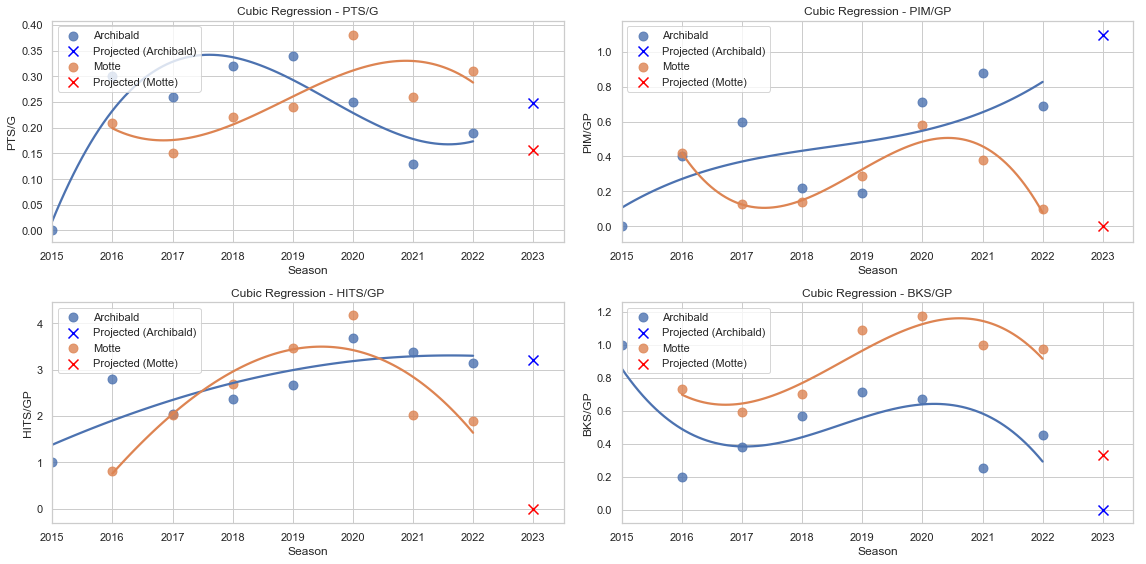

In [43]:
combined_df = pd.concat([archibald, motte], keys=['Archibald', 'Motte'])
statistics_to_compare = ["PTS/G", "PIM/GP", "HITS/GP", "BKS/GP"]
projection_colors = {'Archibald': 'blue', 'Motte': 'red'}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
sns.set(style="whitegrid")

for i, statistic in enumerate(statistics_to_compare):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    for player in ['Archibald', 'Motte']:
        player_data = combined_df.loc[player].reset_index()
        player_data['Season'] = player_data['Season'].str.extract('(\d+)').astype(float)
        
        sns.regplot(
            data=player_data,
            x="Season",
            y=statistic,
            ax=ax,
            ci=None,
            order=3,
            scatter_kws={'s': 80},
            label=player,
        )
    
        x_values = player_data['Season']
        y_values = player_data[statistic]
        coeffs = np.polyfit(x_values, y_values, 3)
        
        next_season = x_values.max() + 1
        projected_value = coeffs[0] * next_season**3 + coeffs[1] * next_season**2 + coeffs[2] * next_season + coeffs[3]
        
        projected_value = max(projected_value, 0)
        
        ax.scatter(next_season, projected_value, color=projection_colors[player], marker='x', s=100, label=f'Projected ({player})')
    
    ax.set_xlabel("Season")
    ax.set_ylabel(statistic)
    ax.set_title(f"Cubic Regression - {statistic}")
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

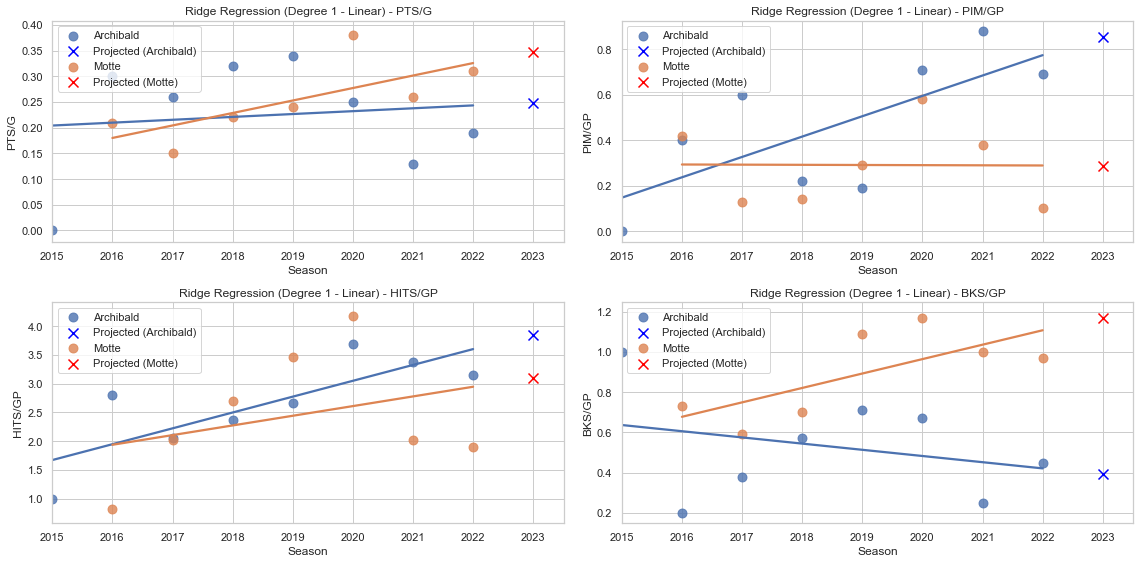

In [61]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

combined_df = pd.concat([archibald, motte], keys=['Archibald', 'Motte'])
statistics_to_compare = ["PTS/G", "PIM/GP", "HITS/GP", "BKS/GP"]
projection_colors = {'Archibald': 'blue', 'Motte': 'red'}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
sns.set(style="whitegrid")

for i, statistic in enumerate(statistics_to_compare):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    for player in ['Archibald', 'Motte']:
        player_data = combined_df.loc[player].reset_index()
        player_data['Season'] = player_data['Season'].str.extract('(\d+)').astype(float)
        
        # Create a Ridge regression model with a polynomial regression of degree 1 (linear regression)
        model = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=1.0))  # Adjust alpha as needed
        
        # Fit the model to the data
        model.fit(player_data[['Season']], player_data[statistic])
        
        # Predict the next season value
        next_season = player_data['Season'].max() + 1
        projected_value = model.predict(np.array([[next_season]]))[0]
        
        # Set projected value to zero if negative
        projected_value = max(projected_value, 0)
        
        sns.regplot(
            data=player_data,
            x="Season",
            y=statistic,
            ax=ax,
            ci=None,
            order=1,  # Set order to 1 for linear trendline and projections
            scatter_kws={'s': 80},
            label=player,
        )
    
        ax.scatter(next_season, projected_value, color=projection_colors[player], marker='x', s=100, label=f'Projected ({player})')
    
    ax.set_xlabel("Season")
    ax.set_ylabel(statistic)
    ax.set_title(f"Ridge Regression (Degree 1 - Linear) - {statistic}")
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Analysis
In comparing Tyler Motte and Josh Archibald across the above statistics - Points per Game, Penalties in Minutes per Game, Hits per Game and Blocks per Game - it can be determined that there is strong evidence to suggest that Motte is a strong replacement for Archibald at the 4th line Right Wing position. Via linear ridge regression, with consideration of the cubic regression, the data suggests that Motte will surpass/outpus a similar points production to that of Archibald, while also significantly outperforming Archibald in Penalty Avoidance & Blocks; however, Archibald was projected to surpass Motte in Hits per 60 for the upcoming season to varying degrees.

# Conclusions
In concluding, based on the above analysis, I believe Motte is an improvement over Archibald, as shown in the projections for Blocks, Pts & PIM's per 60. Additionally, I believe the physical presence of Luke Glendening at the 4th line Center position will provide a strong physical element on the 4th line. I also personally believe Motte will overachieve the projected Hits/60 in the cubic projection and lean closer to that of the linear ridge regression projection. These projections could benefit from utilizing training data with similar 4th line-type players in the league.